<a href="https://colab.research.google.com/github/microprediction/microprediction/blob/master/notebook_examples_blog/Election_in_the_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A simple interpretation of market implied state electoral college probabilities, nothing more. 

In [468]:
states = [ ('arizona',1.29,11),
           ('michigan',1.07,16),
         ('pennsylvania',1.6,20),
        ('georgia',3.1,16),
        ('nevada',1.16,6),
      ('north carolina',4,15)]

# Alaska > T

biden = 237
trump = 217
undecided = sum([a[2] for a in states])
print(undecided)
total = biden + trump + undecided 
print(total)
assert total==538



84
538


In [469]:
import numpy as np
def biden_sim():
   votes = biden
   for s in states:
      probability = 1/s[1]
      if np.random.rand()<probability:
           votes = votes + s[2]
   return votes


Biden win probability is 0.91262
Trump win probability is 0.0825
Tie probability is 0.00488


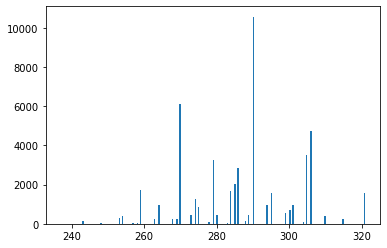

In [470]:
bs = [ biden_sim() for _ in range(50000) ]
ts = [538-b for b in bs]
b_win = np.mean([b>=270 for b in bs])
print('Biden win probability is '+str(b_win))
import matplotlib.pyplot as plt
plt.hist(bs,bins=200)

t_win = np.mean([b<=268 for b in bs ])
tie = np.mean([b==269 for b in bs ])
print('Trump win probability is '+str(t_win))
print('Tie probability is '+ str(tie))



In [471]:
biden_270_299 = np.mean([b>=270 and b<=299 for b in bs])
1/biden_270_299

1.4998350181480038

In [472]:
biden_300_329 = np.mean([b>=300 and b<=329 for b in bs])
1/biden_300_329

4.067024564828372

In [473]:
biden_240_269 = np.mean([b>=240 and b<=269 for b in bs])
1/biden_240_269

11.47842056932966

In [474]:
biden_210_239 = np.mean([b>=210 and b<=239 for b in bs])
1/biden_210_239

3846.1538461538466

In [475]:
trump_270_299 = np.mean([t>=270 and t<=299 for t in ts])
1/trump_270_299


12.159533073929962

In [476]:
trump_300_329 = np.mean([t>=300 and t<=329 for t in ts])
1/trump_300_329

3846.1538461538466

In [477]:
trump_240_269 = np.mean([t>=240 and t<=269 for t in ts])
1/trump_240_269

1.5130882130428203

In [478]:
trump_210_239 = np.mean([t>=210 and t<=239 for t in ts])
1/trump_210_239

3.897116134060795